# Vehicle Ratings

In [122]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Path to ratings dataset

In [123]:
ratings_dataset = '../Processed_Data/API/ratings.pkl'

### Load ratings Data

In [124]:
df_ratings = pd.read_pickle(ratings_dataset)
print(df_ratings.shape)
df_ratings.head()

(7314, 21)


,ComplaintsCount,FrontCrashDriversideRating,FrontCrashPassengersideRating,InvestigationCount,Make,Model,ModelYear,NHTSAElectronicStabilityControl,NHTSAForwardCollisionWarning,NHTSALaneDepartureWarning,...,OverallRating,OverallSideCrashRating,RecallsCount,RolloverRating,RolloverRating2,SideCrashDriversideRating,SideCrashPassengersideRating,SidePoleCrashRating,VehicleDescription,sideBarrierRating-Overall
0,56,4,4,3,MITSUBISHI,ECLIPSE,1992,No,No,No,...,Not Rated,Not Rated,3,Not Rated,Not Rated,Not Rated,Not Rated,Not Rated,1992 Mitsubishi Eclipse 2-DR.,Not Rated
1,0,Not Rated,Not Rated,1,BMW,6 SERIES,2017,Standard,No,No,...,Not Rated,Not Rated,1,Not Rated,Not Rated,Not Rated,Not Rated,Not Rated,2017 BMW 6 Series C RWD,Not Rated
2,1,Not Rated,Not Rated,0,BMW,X5 HYBRID,2021,Standard,Standard,Standard,...,Not Rated,Not Rated,1,Not Rated,Not Rated,Not Rated,Not Rated,Not Rated,2021 BMW X5 Hybrid SUV AWD,Not Rated
3,0,Not Rated,Not Rated,0,LEXUS,LS 500,2021,Standard,Standard,Standard,...,Not Rated,Not Rated,0,Not Rated,Not Rated,Not Rated,Not Rated,Not Rated,2021 Lexus LS 500 4 DR AWD,Not Rated
4,156,5,5,0,CHEVROLET,TRAVERSE,2015,Standard,Optional,Optional,...,5,5,3,4,Not Rated,5,5,5,2015 Chevrolet Traverse SUV AWD,5


# Calculate the final rating for each model
## Convert text rating to number

Max grade: 14*5 = 70 (14 aspects and 5 start)

Grade range: [0,70]

To calculate grade ratio, just add 14 aspects subgrade together then divide by 70

In [125]:
df_ratings.columns

Index(['ComplaintsCount', 'FrontCrashDriversideRating',
       'FrontCrashPassengersideRating', 'InvestigationCount', 'Make', 'Model',
       'ModelYear', 'NHTSAElectronicStabilityControl',
       'NHTSAForwardCollisionWarning', 'NHTSALaneDepartureWarning',
       'OverallFrontCrashRating', 'OverallRating', 'OverallSideCrashRating',
       'RecallsCount', 'RolloverRating', 'RolloverRating2',
       'SideCrashDriversideRating', 'SideCrashPassengersideRating',
       'SidePoleCrashRating', 'VehicleDescription',
       'sideBarrierRating-Overall'],
      dtype='object')

In [126]:
mapping = {'No':0, 'Not Rated':0,
           'Optional': 2.5, 
           'Standard': 5}
df_ratings.replace( {'FrontCrashDriversideRating': mapping,
                    'FrontCrashPassengersideRating': mapping,
                    'NHTSAElectronicStabilityControl': mapping,
                    'NHTSAForwardCollisionWarning': mapping,
                    'NHTSALaneDepartureWarning': mapping,
                    'OverallFrontCrashRating': mapping,
                    'OverallRating': mapping,
                    'OverallSideCrashRating': mapping,
                    'RolloverRating': mapping,
                    'RolloverRating2': mapping,
                    'SideCrashDriversideRating': mapping,
                    'SideCrashPassengersideRating': mapping,
                    'SidePoleCrashRating': mapping,
                    'sideBarrierRating-Overall': mapping},
                    inplace=True
                  )

In [127]:
df_num_rating = df_ratings[['FrontCrashDriversideRating',
       'FrontCrashPassengersideRating','NHTSAElectronicStabilityControl',
       'NHTSAForwardCollisionWarning', 'NHTSALaneDepartureWarning',
       'OverallFrontCrashRating', 'OverallRating', 'OverallSideCrashRating',
       'RolloverRating', 'RolloverRating2',
       'SideCrashDriversideRating', 'SideCrashPassengersideRating',
       'SidePoleCrashRating','sideBarrierRating-Overall']]
df_num_rating.head()

,FrontCrashDriversideRating,FrontCrashPassengersideRating,NHTSAElectronicStabilityControl,NHTSAForwardCollisionWarning,NHTSALaneDepartureWarning,OverallFrontCrashRating,OverallRating,OverallSideCrashRating,RolloverRating,RolloverRating2,SideCrashDriversideRating,SideCrashPassengersideRating,SidePoleCrashRating,sideBarrierRating-Overall
0,4,4,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,0,0,5.0,5.0,5.0,0,0,0,0,0,0,0,0,0
3,0,0,5.0,5.0,5.0,0,0,0,0,0,0,0,0,0
4,5,5,5.0,2.5,2.5,5,5,5,4,0,5,5,5,5


## Calculate grades

In [128]:
df_num_rating = df_num_rating.apply(pd.to_numeric, errors='coerce')
df_num_rating["sum"] = df_num_rating.sum(axis=1)
df_num_rating.groupby('sum').size()

sum
0.0     117
1.0       7
2.0      22
2.5       6
3.0      15
       ... 
62.0     68
62.5     13
63.0     86
64.0    167
65.0     59
Length: 116, dtype: int64

In [139]:
final_rating = pd.concat([df_ratings[['Make','Model','ModelYear','VehicleDescription']], (df_num_rating['sum']/70).rename('gradeRatio')], axis=1)
final_rating

,Make,Model,ModelYear,VehicleDescription,gradeRatio
0,MITSUBISHI,ECLIPSE,1992,1992 Mitsubishi Eclipse 2-DR.,0.114286
1,BMW,6 SERIES,2017,2017 BMW 6 Series C RWD,0.071429
2,BMW,X5 HYBRID,2021,2021 BMW X5 Hybrid SUV AWD,0.214286
3,LEXUS,LS 500,2021,2021 Lexus LS 500 4 DR AWD,0.214286
4,CHEVROLET,TRAVERSE,2015,2015 Chevrolet Traverse SUV AWD,0.842857
...,...,...,...,...,...
7309,CHEVROLET,MALIBU,2022,2022 Chevrolet Malibu 4 DR FWD,0.757143
7310,DODGE,CHARGER,2015,2015 Dodge Charger 4 DR AWD,0.214286
7311,FORD,EXPLORER,2004,2004 Ford Explorer 4-DR.,0.392857
7312,RAM,2500,2021,2021 Ram 2500 Crew PU/CC 2WD,0.764286


## Detect the new energy data

In [143]:
NEV_Symbol = ['HYBRID','ELEC','HEV','HV','EV','ENERGI','ECO','PLUG-IN','TESLA']
pattern = '|'.join(NEV_Symbol)

# Convert str to upper case
final_rating['VehicleDescription'] = final_rating['VehicleDescription'].str.upper()

# Determine whether New Energy vehicle or Traditional vehicle, add new column called fuel_type.
final_rating['fuel_type'] = final_rating.VehicleDescription.str.contains(pattern)
mapping = {False: 'Traditional', True:'New energy'}
final_rating.replace( {'fuel_type': mapping}, inplace=True )
final_rating.head()

,Make,Model,ModelYear,VehicleDescription,gradeRatio,fuel_type
0,MITSUBISHI,ECLIPSE,1992,1992 MITSUBISHI ECLIPSE 2-DR.,0.114286,Traditional
1,BMW,6 SERIES,2017,2017 BMW 6 SERIES C RWD,0.071429,Traditional
2,BMW,X5 HYBRID,2021,2021 BMW X5 HYBRID SUV AWD,0.214286,New energy
3,LEXUS,LS 500,2021,2021 LEXUS LS 500 4 DR AWD,0.214286,Traditional
4,CHEVROLET,TRAVERSE,2015,2015 CHEVROLET TRAVERSE SUV AWD,0.842857,New energy


In [144]:
final_rating.groupby('fuel_type').size()

fuel_type
New energy     1760
Traditional    5554
dtype: int64

# Brand

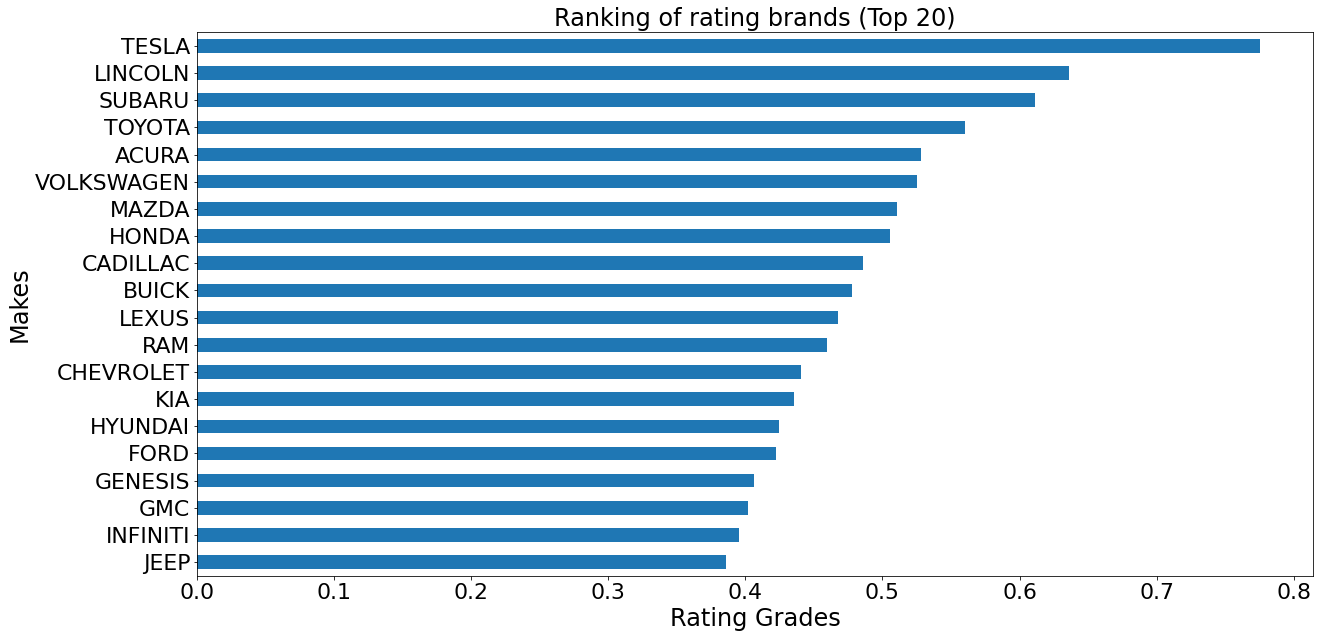

In [163]:
fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = final_rating.groupby('Make')['gradeRatio'].mean().sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Ranking of rating brands (Top 20)", fontsize=24)
plt.xlabel("Rating Grades", fontsize=24)
plt.ylabel("Makes", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Rating_brand_top20.png', format='png')

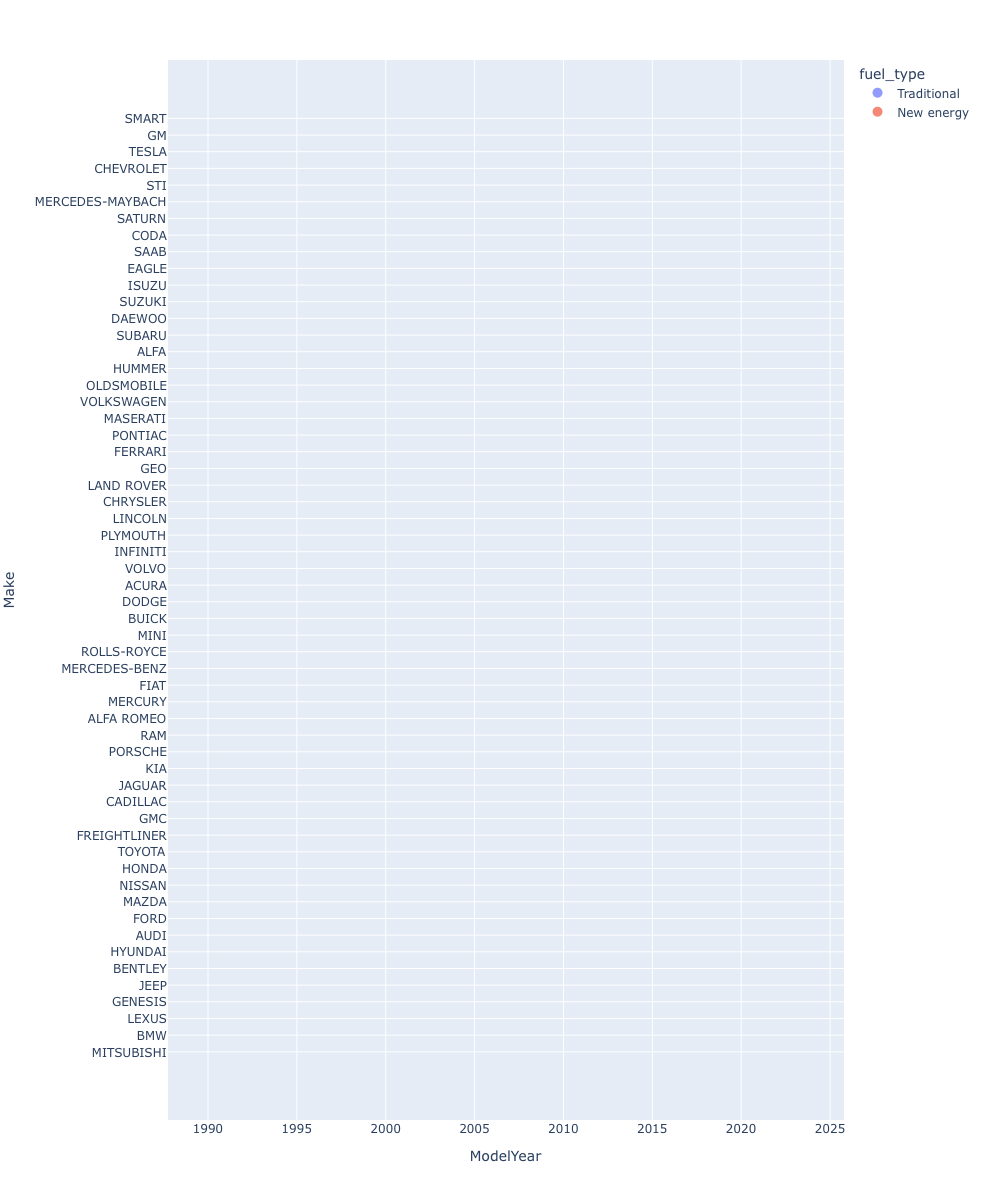

In [184]:
fig = px.scatter(final_rating, x="ModelYear", y="Make", color="fuel_type",
                 size='gradeRatio', hover_data=['VehicleDescription'],
                width=1000, height=1200)
fig.show()

In [ ]:
fig = px.scatter(final_rating, x="ModelYear", y="Make", color="fuel_type",
                 size='gradeRatio', hover_data=['VehicleDescription'],
                width=1000, height=1200)
fig.show()

# Fuel Type

In [189]:
make_fuel_rating = pd.DataFrame(final_rating.groupby(['Make','fuel_type'])['gradeRatio'].mean().sort_values(ascending=False))
make_fuel_rating.reset_index(inplace=True)
make_fuel_rating

,Make,fuel_type,gradeRatio
0,MITSUBISHI,New energy,0.821429
1,INFINITI,New energy,0.808571
2,TOYOTA,New energy,0.780952
3,TESLA,New energy,0.775510
4,ACURA,New energy,0.702198
...,...,...,...
80,GENESIS,New energy,0.071429
81,JEEP,New energy,0.071429
82,LAND ROVER,Traditional,0.070536
83,BENTLEY,Traditional,0.069133


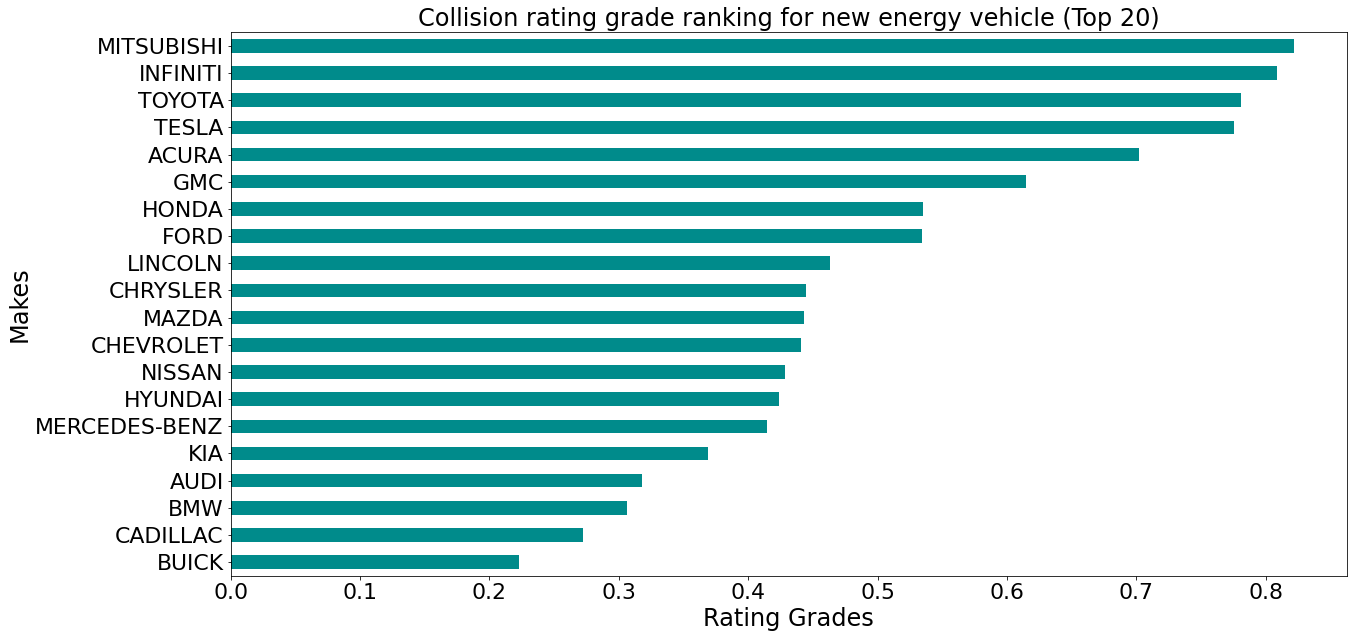

In [204]:
NEV_rating = make_fuel_rating[make_fuel_rating['fuel_type'] == 'New energy']\
                .sort_values(by='gradeRatio',ascending=False)
NEV_rating = NEV_rating.set_index('Make')
fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = NEV_rating['gradeRatio'].head(20).plot(kind="barh",color="darkcyan")
plt.title("Collision rating grade ranking for new energy vehicle (Top 20)", fontsize=24)
plt.xlabel("Rating Grades", fontsize=24)
plt.ylabel("Makes", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Collision_rating_ranking_for_NEV_top20.png', format='png')

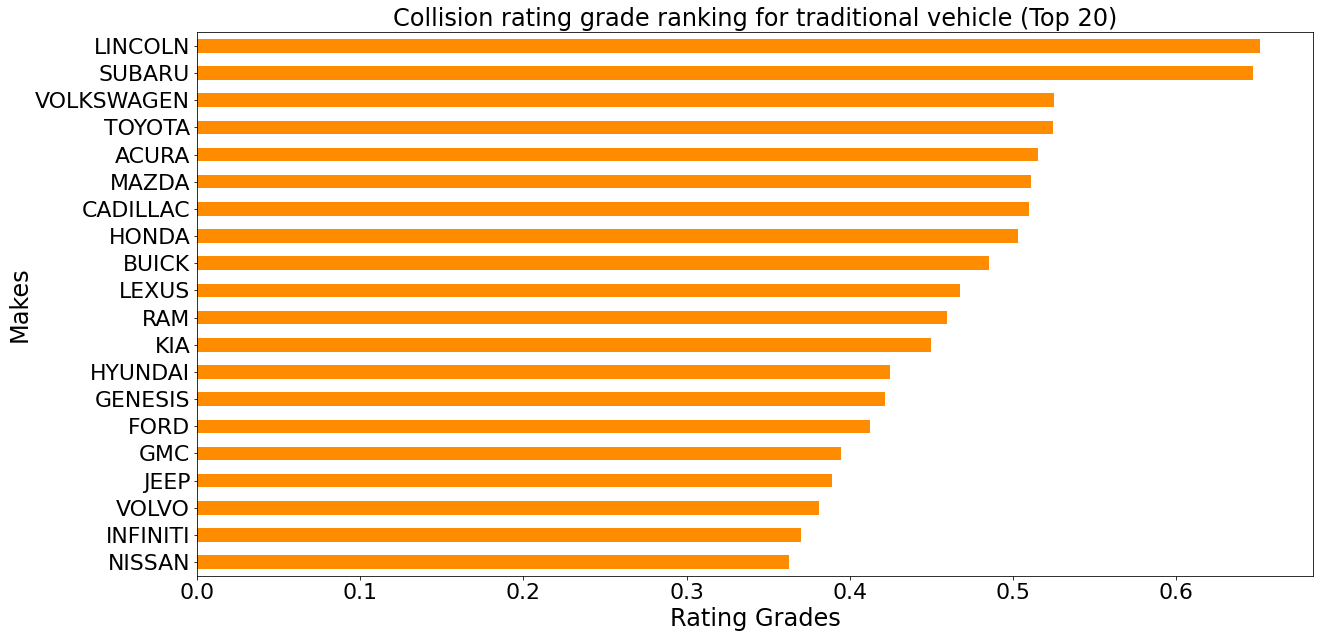

In [206]:
TV_rating = make_fuel_rating[make_fuel_rating['fuel_type'] == 'Traditional']\
                .sort_values(by='gradeRatio',ascending=False)

TV_rating = TV_rating.set_index('Make')
fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = TV_rating['gradeRatio'].head(20).plot(kind="barh",color="darkorange")
plt.title("Collision rating grade ranking for traditional vehicle (Top 20)", fontsize=24)
plt.xlabel("Rating Grades", fontsize=24)
plt.ylabel("Makes", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Collision_rating_ranking_for_traditionalVehicle_top20.png', format='png')